## 最小编辑距离

利用编辑距离可以判断两个字符串的相似程度，即从一个字符串到另一个字符串所需要的编辑次数，包括插入字符，删除字符及替换字符这三种操作。最小编辑距离即从一个字符串到另一个字符串所需要的最小编辑次数。

在这里定义的单字符编辑操作有且仅有三种：

- 插入（Insertion）
- 删除（Deletion）
- 替换（Substitution）

insertion 和 deletion 的 cost 为 1，substitution 的 cost 为 2. 


## 动态规划算法

问题分析：动态规划思想

1. `dp[i][j]`表示将字符串 `A[0: i-1]` 转变为 `B[0: j-1]` 的最小步骤数。

2. 边界情况：
- 当 `i = 0` , 即 A 串为空时，那么转变为 B 串就是不断添加字符，`dp[0][j] = j`。
- 当 `j = 0`，即 B 串为空时，那么转变为 B 串就是不断删除字符，`dp[i][0] = i`。

3. 对应三种字符操作方式：

- 插入操作：`dp[i][j - 1] + 1` 相当于为 B 串的最后插入了 A 串的最后一个字符；
- 删除操作：`dp[i - 1][j] + 1` 相当于将 B 串的最后字符删除 ;
- 替换操作：`dp[i - 1][j - 1] +（A[i - 1] != B[j - 1]）`相当于通过将 B 串的最后一个字符替换为 A 串的最后一个字符。

4. 所以dp方程式为:
- `dp[i][j] = dp[i-1][j-1], A[i-1] == B[j-1] `
- `dp[i][j] = min(dp[i-1][j-1]+2, dp[i][j-1]+1, dp[i-1][j]+1), A[i-1] != B[j-1]`

Python实现（时间复杂度：O(mn)，空间复杂度：O(mn)）：

## 案例

计算 execution 和 intention 的最小编辑距离，得到的 D 矩阵如下：


![](./images/algo.png)
![](./images/table_empty.png)
![](./images/table_ful.png)

In [2]:
class Solution:
    def minDistance(self, word1, word2):
        """
        :type word1: str
        :type word2: str
        :rtype: int
        """
        m, n = len(word1), len(word2)
        if m == 0:return n
        if n == 0:return m
        dp = [[0]*(n+1) for _ in range(m+1)]  # 初始化dp和边界
        for i in range(1, m+1): dp[i][0] = i
        for j in range(1, n+1): dp[0][j] = j
        for i in range(1, m+1):  # 计算dp
            for j in range(1, n+1):
                if word1[i - 1] == word2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
                else:
                    dp[i][j] = min(dp[i - 1][j - 1] + 2, dp[i][j - 1] + 1, dp[i - 1][j] + 1)
        return dp[m][n]
 

In [3]:
solu = Solution()
word1, word2 = 'execution', 'intention'
solu.minDistance(word1,word2)

8

## 汉明距离

两个整数之间的汉明距离指的是这两个数字对应二进制位不同的位置的数目。

给出两个整数 x 和 y，计算它们之间的汉明距离。

```
输入: x = 1, y = 4

输出: 2

解释:
1   (0 0 0 1)
4   (0 1 0 0)
```

上面的箭头指出了对应二进制位不同的位置。



根据以上定义，提出一种 XOR 的位运算，当且仅当输入位不同时输出为 1。

**计算 x 和 y 之间的汉明距离，可以先计算 x XOR y，然后统计结果中等于 1 的位数。**

![](./images/xor.png)

In [7]:
class Solution:
    def hammingDistance(self, x: int, y: int) -> int:
        return bin(x ^ y).count('1')


class Solution2(object):
    def hammingDistance(self, x, y):
        """
        :type x: int
        :type y: int
        :rtype: int
        """
        xor = x ^ y
        distance = 0
        while xor:
            # mask out the rest bits
            if xor & 1:
                distance += 1
            xor = xor >> 1
        return distance

In [9]:
solu = Solution()
solu2 = Solution2()

solu.hammingDistance(2,5), solu2.hammingDistance(2,5)

(3, 3)

## Dice 系数

In [14]:
class Solution:

    def dice_coefficient(self, a, b):
        """dice coefficient 2nt/na + nb."""
        a_bigrams = set(a)
        b_bigrams = set(b)
        overlap = len(a_bigrams & b_bigrams)
        return overlap * 2.0/(len(a_bigrams) + len(b_bigrams))
 
if __name__ == '__main__':
    solu = Solution()

    a= solu.dice_coefficient('execution','intention')
    print(a)
    b = solu.dice_coefficient('execution','student')
    print(b)

0.7692307692307693
0.5714285714285714


## Jaccard系数



In [19]:
class Solution:
    def jaccard_sim(self, a, b):
        unions = len(set(a).union(set(b)))
        intersections = len(set(a).intersection(set(b)))
        return 1. * intersections / unions

if __name__ == '__main__':
    solu = Solution()

    a= solu.jaccard_sim('execution','intention')
    print(a)
    b = solu.jaccard_sim('execution','student')
    print(b)   

0.625
0.4


## Ngram

In [25]:
class Solution:
    def __init__(self, N):
        self.N = N
    def n_grams(self, sentence):
        return [sentence[i:i+N] for i in range(len(sentence)-N+1)]


sentence = "I really like python, it's pretty awesome.".split()
if __name__ == '__main__':
    N = 2
    solu = Solution(N)
    grams = solu.n_grams(sentence)
    for gram in grams: 
        print(gram)

    print("")
    N = 4
    solu = Solution(N)
    grams = solu.n_grams(sentence)
    for gram in grams: 
        print(gram)

['I', 'really']
['really', 'like']
['like', 'python,']
['python,', "it's"]
["it's", 'pretty']
['pretty', 'awesome.']

['I', 'really', 'like', 'python,']
['really', 'like', 'python,', "it's"]
['like', 'python,', "it's", 'pretty']
['python,', "it's", 'pretty', 'awesome.']


## Graph EditDistance

In [26]:
import networkx as nx
G1 = nx.cycle_graph(6)
G2 = nx.wheel_graph(7)

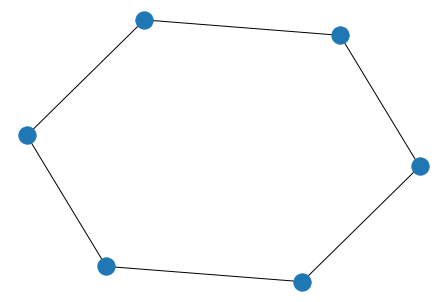

In [27]:
nx.draw(G1)

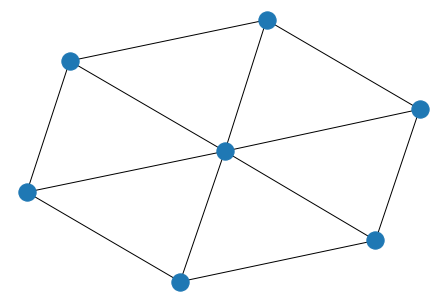

In [29]:
nx.draw(G2)

In [30]:
nx.graph_edit_distance(G1, G2, roots=(0, 0))

7.0

## SimRank

SimRank is a similarity metric that says “two objects are considered to be similar if they are referenced by similar objects.

In [35]:
from numpy import array
G = nx.cycle_graph(4)
sim = nx.simrank_similarity(G)
lol = [[sim[u][v] for v in sorted(sim[u])] for u in sorted(sim)]
sim_array = array(lol)

In [36]:
sim_array

array([[1.        , 0.        , 0.81818182, 0.        ],
       [0.        , 1.        , 0.        , 0.81818182],
       [0.81818182, 0.        , 1.        , 0.        ],
       [0.        , 0.81818182, 0.        , 1.        ]])